# Twitter Skill Recommendation Engine

### Members: Soungsovichea Toch, Rohan Ravulapalli, Aadarsh Ganta, Joshua Sailer, Andrew Kleinman

<style>
    img {
        max-width: 100px;
        height: auto;
    }
</style>
### Description:
Computational Modeling and Data Analytics is a relatively newer addition to Virginia Tech's undergraduate program catalog, being introduced in 2015.
The program is filled with enthusiastic, vibrant and intelligent individuals, many of which aspire to land roles relating to
the careers of Data Science and Analytics in their desired sectors of interest.

Data science, similar to other technical fields, poses a very fluctuating job market. The skills enforced by big name employers for data science positions can change rapidly within the span of a year, let alone a few months. Hence, constant learning, adaptability and investment into accumulating the appropriate skills is necessary to succeed in this space and maintain a lasting career.

The traditional approach of manually scanning the skills section of data science posting from a job board such as indeed is undoubtably cumbersome. Furthermore, many of the skills listed for data science positions might be "filler" skills and not actually used on the job or expected from canditates applying. Hence, this project aims to explore a rather unique approach towards determining the relevant skills and traits desired for most data science positions: twitter tweets.

Twitter tweets are a notoriously popular way of communicating ideas in the social media world due to their simplistic nature: most tweets are short, sweet and to the point of whatever topic they are meant to address. When applied to the career world, this can shed new light in terms of determining what skills are relevant towards certain careers. 

Unlike job posts on websites such as Indeed and Monster, which may overlist the amount of requirements required for a particular position, employers and company CEO's on twitter generally give more straight-forward summaries regarding what they look for in candidates applying for particular roles.


Examples:

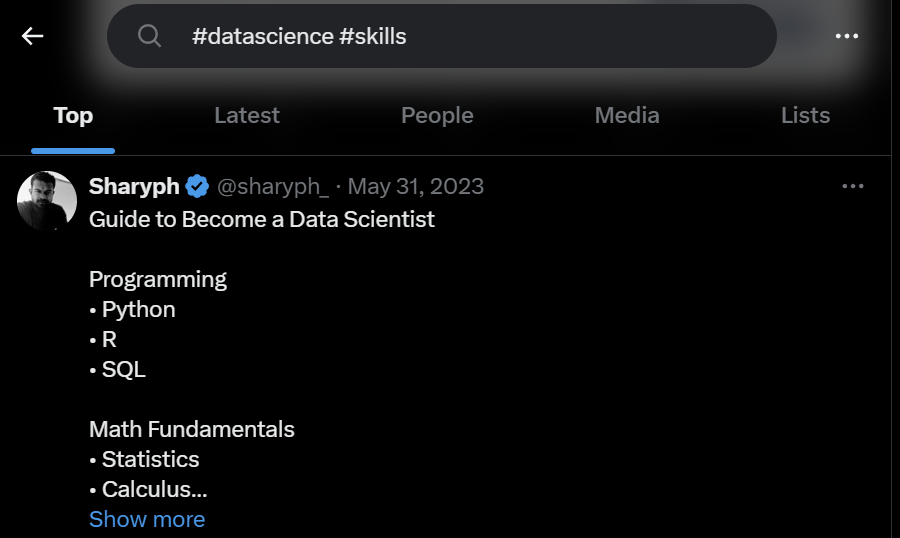 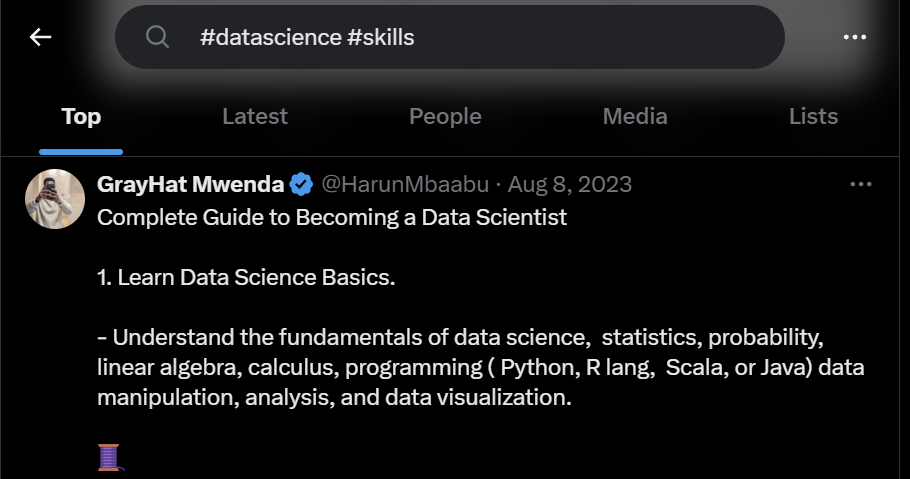

As you can see, just by filtering by a few hashtags such as #DataScience and #Skills, we were able to get various tweets from different employers and data scientists, providing short, concise and direct summaries of what skills relate to the position of a data scientist, as well as specific topics that should be emphasized on ones learning journey.

This project aims to develop a skill recommendation model for CMDA majors and aspiring data scientists by analyzing a large-scale dataset of data science-related tweets. We have used text analysis techniques to identify the most frequently mentioned skills. Skill catalogs available online were used to filter and extract terms related to skills from the tweets. We used data preprocessing techniques (i.e. stop word removal, tokenizationan, stemming) to extract valuable information from the tweets. We will also analyze the frequency of skill mentions over time to identify trends and changes in the required skillset in order to provide skill recommendations.

### Research Questions

1. What are the most frequently mentioned categories of skills in data science related tweets from 2019 - 2023? 

2.  Which locations across the U.S. offer the highest demand for data science professions?
   
1. What is the change in the frequency of mention of specific skills (i.e. SQL, Python, Statistics) found in data science related tweets over the past 4 years (2019-2023)?


### Source Data

The dataset used was from Kaggle, and consisted of 50,000 tweets from twitter relating to job openings for IT (including machine learning, data science, analytics, data engineering and many more) from 2019 to 2023. The kaggle source link below takes you to the website where you can download the csv file.

https://www.kaggle.com/datasets/prasad22/job-vacancy-tweets/data

## Question 1

What are the most frequently mentioned categories of skills in data science related tweets from 2019 - 2023?

#### Motivation

Determining the type of skills endorsed by recruiters for data science related job posts on twitter can help aspiring data scientists navigate through the dynamic job market and prioritize learning high-yield skills.

#### Methods

Insights were extracted using an IT job tweet dataset from Kaggle, comprising of 50,000 tweets for open IT jobs, with a strong portion of the tweets emphasizing data science, data engineer, machine learning, data analytics and database related positions. The dataset provides tweets, hashtags and employer usernames (the users posting the job openings) that we can use to query and filter data science related tags and terms.

In general, we determined two ways to approach analysis of term frequency for the tweets: parsing the tags of the tweets, or parsing the actual text body of the tweets, not including hashtags. In order to maximize our insights, we utilized both methods in order to gather information for answering our question, as well as construct additional insights to answer related questions that popped up during brainstorming.

#### Analysis

In [1]:
'''
LIBRARY IMPORTS AND DATA LOADING
'''

import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
import re
import string
import requests
import bs4
from cleantext import clean
import numpy as np

data = pd.read_csv("Job_Tweets.csv")

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning)) # warnings are interfering with the visualization outputs.


#### Filtering

Due to the scope of the dataset, we decided to expand our search for not only 
tweets mentioning "data science", but rather, data-related tweets in general, as this allows us to garner more insights for data science, since data science
is an interdisplinary field that also possess overlap with other fields such as data analytics, data engineering and data architecture.

In [2]:
# Filter the DataFrame where column 'A' or column 'H' contains the text 'data', case insensitive
filtered = data[data['Text'].str.contains('data', case=False, na=False) | data['Hashtag'].str.contains('data', case=False, na=False)]

#### Hashtag Analytics

As previously mentioned, one method we can use for determining what terms are most frequently associated with data science job postings on twitter is to analyze the hashtags included across the data science related tweets. 

Text(0.5, 1.0, 'Top 50 Most Frequent Data Related Tags')

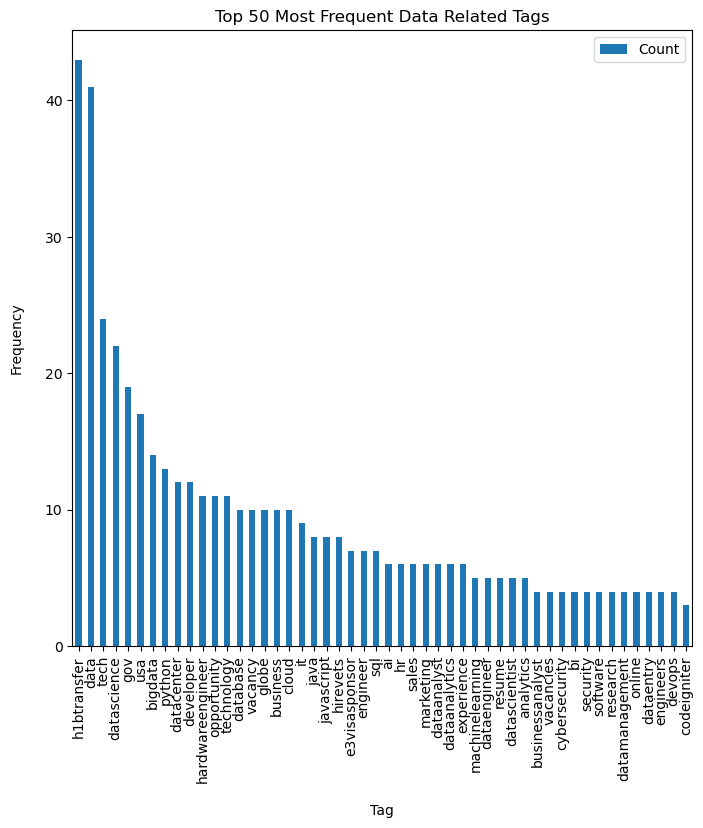

In [3]:
filtered_data = filtered.copy()
filtered_data['Hashtag'] = filtered['Hashtag'].map(lambda x: str(x))
filtered_data.Hashtag = filtered_data.Hashtag.map(lambda s: s.replace("[", ''))
filtered_data.Hashtag = filtered_data.Hashtag.map(lambda s: s.replace("]", ''))
filtered_data.Hashtag = filtered_data.Hashtag.map(lambda s: s.replace("'", ''))
filtered_data.Hashtag = filtered_data.Hashtag.map(lambda s: s.lower())
filtered_data['Tags'] = filtered_data['Hashtag'].apply(lambda s: s.split(', '))

text = ' '.join(filtered_data['Hashtag'])
text = text.split(', ')
remove_tag = ['hiring', 'job', 'career', 'recruit', 'work', 'apply']
#text_freq = [(word, text.count(word)) for word in text if 'job' not in word]
text_freq = [(word, text.count(word)) for word in text if not any(tag in word for tag in remove_tag)]
remove_dup = set(text_freq)
count = sorted(list(remove_dup), key = lambda tup: tup[1], reverse = True)
count

table = pd.DataFrame(count, columns=['Tag', 'Count'])

top_table = table.head(50)

axes = top_table.plot.bar(x = 'Tag', y = 'Count', figsize = (8, 8))

axes.set_ylabel("Frequency", labelpad=15)

axes.set_xlabel("Tag", labelpad=15)

axes.set_title("Top 50 Most Frequent Data Related Tags")

#### Insight

Based on the provided bar chart, the tag frequencies indicate that employers prefer canditates who hold at least an H1B visa sponsorship, as well as candidates who are aspiring data scientists and possess strong python skills (with python being the most frequent skill/programming related tag)

Additionally, the word "engineer" seems to be common in many of the most frequent hashtags, with hashtags such as "dataengineer", "engineer", and "hardwareengineer".

#### Text Analytics

Alternatively, instead of analyzing hashtags, we can also examine the actual body of texts of the tweets in order to determine the skillsets and traits that recruiters and employers 
advertise for data science related positions.

In [4]:
'''
DATA SCIENCE TERMS/TECHNICAL SKILLS: Fetching a valid list of skills from online

In order to accurately identify data science "skills" (i.e. a specific programming language, framework or algorithm), it is best to use
a glossary in order to filter the terms of the tweets that may not classify as "skills"
'''

DS_Glossary_Page = requests.get("https://www.datascienceglossary.org/") 

# this webpage holds a data science glossary, listing the common skills and terms
# for data science

if DS_Glossary_Page.reason != "OK":
    raise Exception("Fetch Failed")

DS_Glossary_Page2 = requests.get("https://www.coursera.org/resources/data-science-terms")

if DS_Glossary_Page2.reason != "OK":
    raise Exception("Fetch Failed")

In [5]:
'''
CONSTRUCTING SKILL GLOSSARY
'''
soup = bs4.BeautifulSoup(DS_Glossary_Page.text, "html5lib")

DS_terms = soup.find_all("a")

DS_Related_Jobs = list(map(lambda x: x.lower(), ["Data Scientist","Data Analyst","Data Engineer","Data Architect","Data Storyteller",
"Machine Learning Scientist",
"Machine Learning Engineer",
"Business Intelligence Developer",
"Database Administrator"]))

DS_terms = {term.text.lower() for term in DS_terms[5:120]}

soup2 = bs4.BeautifulSoup(DS_Glossary_Page2.text, "html5lib")

DS_terms2 = soup2.find_all("b")[1:-1]

DS_terms2 = {term.text.strip().lower() for term in DS_terms2 if term.text.find("more")==-1}

All_DS_Terms = DS_terms.union(DS_terms2)

if "data" in All_DS_Terms:
    All_DS_term.remove("data")

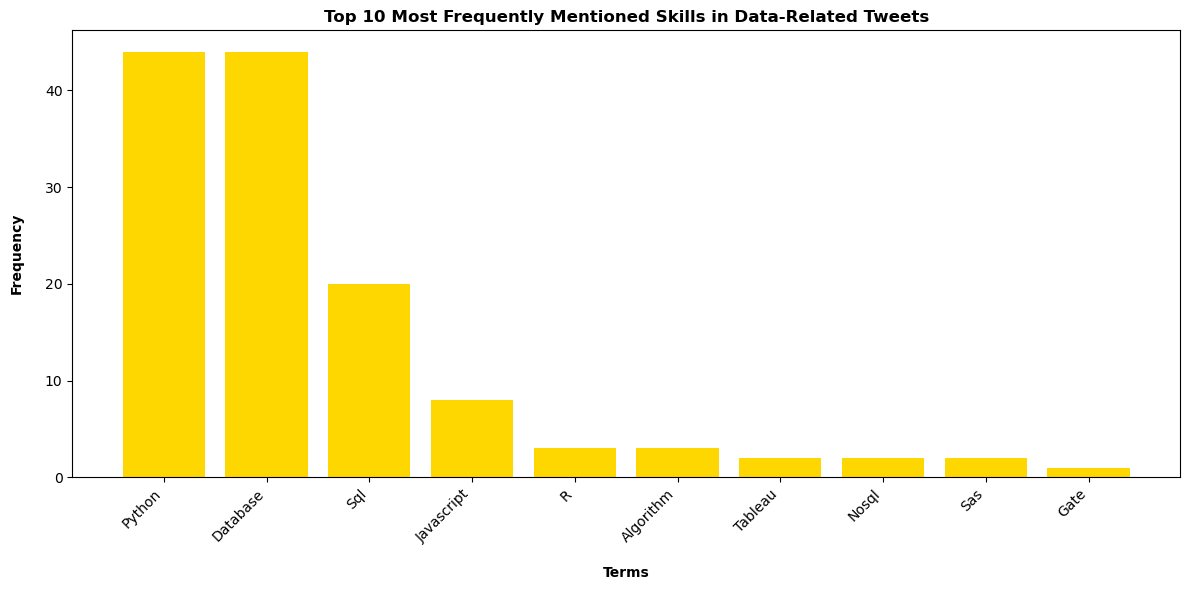

In [6]:
stopwords = set(list(pd.read_csv("stopwords.csv")))

filtered_tweets = filtered[["Text"]]

filtered_tweets["Text"] = filtered_tweets.Text.map(lambda tweet: "".join(term for term in tweet if term[0] != "#") )
# the filtered dataframe, from the preceding code cell, is a dataframe that includes the data-related tweets

# this time, rather than analyzing the hashtags, let us analyze
# the actual job descriptions (tweets) by the employers

def CleanseText(text):
    text = re.sub(r'https?\S+', '', text) # removing links
    
    # Remove punctuation + digits
    text = re.sub(f'[{re.escape(string.punctuation + string.digits)}]', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    return text.lower()

def Identify_Jobs(text):
    # We may want to remove job titles from the vocabulary since they are likely to be common, but do not really provide insights
    # in regards to job skillset or traits 
    mentioned_jobs = [job for job in DS_Related_Jobs if text.find(job) != -1]
    for job in mentioned_jobs:
        text = text.replace(job, "")
    return (text, mentioned_jobs)
    
def strip_emoji(text): # removes emojis from a string
    RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    return RE_EMOJI.sub(r'', text)

# Cleansing the tweets:

filtered_tweets["Text"] = filtered_tweets.Text.map(CleanseText)

filtered_tweets["Bag"] = filtered_tweets.Text.map(lambda tweet: Identify_Jobs(tweet)[0].split())

filtered_tweets["Bag"] = filtered_tweets.Bag.map(lambda bag: [strip_emoji(term) for term in bag if term not in stopwords])

All_Tweet_Terms = filtered_tweets["Bag"].sum()

DS_Term_Frequencies = Counter([term.title() for term in All_Tweet_Terms if term in All_DS_Terms]).most_common(10)

DS_Term_Frequencies = pd.DataFrame(DS_Term_Frequencies, columns=["Term", "Frequency"])

plt.figure(figsize=(12, 6))
plt.bar(DS_Term_Frequencies["Term"], DS_Term_Frequencies['Frequency'], color='gold')
plt.xlabel('Terms', labelpad=15, weight="bold", fontsize=10)
plt.ylabel('Frequency', labelpad=15, weight="bold", fontsize=10)
plt.title('Top 10 Most Frequently Mentioned Skills in Data-Related Tweets', fontsize=12, weight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insight

Based on the bar plot, it appears that employers and recruiters for data science related jobs on X.com strongly favor those with strong Python, Database 
and SQL skills. These skills have historically always been frequently associated with the data science profession, with this bar plot indicating that 
they are still vital for becoming a strong data scientist. Additionally, specialized statistical languages such as R and SAS may also be useful to learn in order to become a data scientist.

#### Conclusion

Question: What are the most frequently mentioned categories of skills in data science related tweets from 2019 - 2023? 

Answer:  

- based on our insights, it appears that programming and database related skills are strongly associated with data science job postings on twitter, backed up by the fact that Python, SQL, R, SAS and database skills appeared amongst the top 10 most frequently mentioned skills across the data science tweets.
  
- Additionally, possessing an H1B visa, and having strong engineering skills seems to increase your chances of satisfying employer's requirements for data science positions, with the most frequent hashtags containing terms such as "h1btransfer", "data", and "engineer".


## Question 2

Which locations across the U.S. possess the highest demand for data science professions?

#### Motivation

Determining the differences in demand across various states and cities can help aspiring data scientists determine where, geographically, they are likely to have the most success in finding jobs related to their expertise

#### Methods

Using official state and city maps from online, we analyzed the frequency of mention of different states and cities across the data science tweets, as well as the hashtags associated with the tweets for each city

#### Analysis

#### Data Science Hashtag Frequency by City, and Non-Technical Hashtags

As we developed insights to answer the question of what terms and skills are frequently associated with data science tweets, we also dug deeper and tried to examine the relationship between city locations and their corresponding hashtag frequencies for tech job postings.

The motivation behind this was to determine the demand for tech careers such as data science across different cities. Employers from certain cities may have a higher need for IT professionals and data scientists compared to other cities. We measured job demand by combined hashtag frequency of all tweets in the tech job tweet dataset.

Additionally, we attempted to determine which non-technical terms are most frequently associated with the posted IT positions. This was done by filtering out the top 10 hashtags, as previous insights indicated that the top portion of hashtags in terms of frequency were mostly technical terms (i.e. "data science", "python", "big data"). The motivation behind this was to validate the dataset, and see if most of the jobs posted are IT-related, and are open jobs.

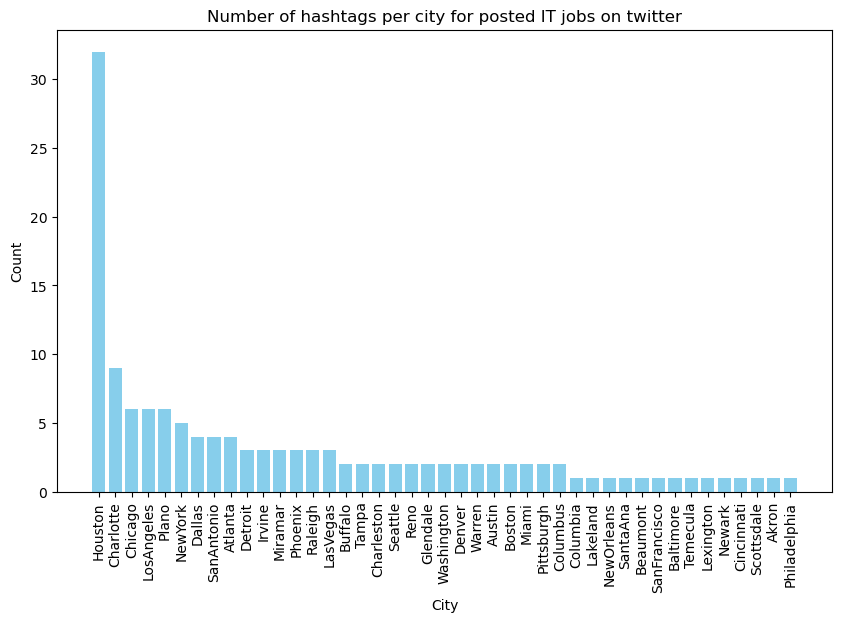

In [7]:
df = data.copy()
df = df[df['Text'].str.contains('data', case=False, na=False) | df['Hashtag'].str.contains('data', case=False, na=False)]
def safe_literal_eval(val):
    if pd.isna(val):  
        return []     
    return literal_eval(val)

df['Hashtag'] = df['Hashtag'].apply(safe_literal_eval)


all_items = [item for sublist in df['Hashtag'] for item in sublist]


item_counts = Counter(all_items)


item_counts

cities_list = [
    "NewYork", "LosAngeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "SanAntonio",
    "SanDiego", "Dallas", "San Jose", "Austin", "Jacksonville", "FortWorth", "Columbus", "Charlotte",
    "SanFrancisco", "Indianapolis", "Seattle", "Denver", "Washington", "Boston", "ElPaso", "Nashville",
    "Detroit", "LasVegas", "Portland", "Memphis", "Louisville", "Milwaukee", "Baltimore", "Albuquerque",
    "Tucson", "Fresno", "Sacramento", "Mesa", "Kansas City", "Atlanta", "Omaha", "Colorado Springs", 
    "Raleigh", "Miami", "LongBeach", "Virginia Beach", "Oakland", "Minneapolis", "Tulsa", "Tampa",
    "Arlington", "NewOrleans", "Wichita", "Cleveland", "Bakersfield", "Aurora", "Anaheim", "Honolulu",
    "SantaAna", "Riverside", "Corpus Christi", "Lexington", "Henderson", "Stockton", "Saint Paul", 
    "Cincinnati", "St.Louis", "Pittsburgh", "Greensboro", "Lincoln", "Anchorage", "Plano", "Orlando",
    "Irvine", "Newark", "Durham", "ChulaVista", "Toledo", "Fort Wayne", "St.Petersburg", "Laredo",
    "Jersey City", "Chandler", "Madison", "Lubbock", "Scottsdale", "Reno", "Buffalo", "Gilbert", 
    "Glendale", "North Las Vegas", "Winston-Salem", "Chesapeake", "Norfolk", "Fremont", "Garland", 
    "Irving", "Hialeah", "Richmond", "Boise", "Spokane", "Baton Rouge", "Tacoma", "San Bernardino", 
    "Modesto", "Fontana", "Des Moines", "Moreno Valley", "Santa Clarita", "Fayetteville", "Birmingham", 
    "Oxnard", "Rochester", "Port St. Lucie", "Grand Rapids", "Huntsville", "Salt Lake City", "Frisco",
    "Yonkers", "Amarillo", "Glendale", "Huntington Beach", "McKinney", "Montgomery", "Augusta", 
    "Aurora", "Akron", "Little Rock", "Tempe", "Columbus", "Overland Park", "Grand Prairie", "Tallahassee", 
    "Cape Coral", "Mobile", "Knoxville", "Shreveport", "Worcester", "Ontario", "Vancouver", "Sioux Falls", 
    "Chattanooga", "Brownsville", "Fort Lauderdale", "Providence", "Newport News", "Rancho Cucamonga",
    "Santa Rosa", "Peoria", "Oceanside", "Elk Grove", "Salem", "Pembroke Pines", "Eugene", "Garden Grove", 
    "Cary", "Fort Collins", "Corona", "Springfield", "Jackson", "Alexandria", "Hayward", "Clarksville", 
    "Lakewood", "Lancaster", "Salinas", "Palmdale", "Hollywood", "Springfield", "Macon", "Kansas City", 
    "Sunnyvale", "Pomona", "Killeen", "Escondido", "Pasadena", "Naperville", "Bellevue", "Joliet", 
    "Murfreesboro", "Midland", "Rockford", "Paterson", "Savannah", "Bridgeport", "Torrance", "McAllen", 
    "Syracuse", "Surprise", "Denton", "Roseville", "Thornton", "Miramar", "Pasadena", "Mesquite", 
    "Olathe", "Dayton", "Carrollton", "Waco", "Orange", "Fullerton", "Charleston", "West Valley City", 
    "Visalia", "Hampton", "Gainesville", "Warren", "Coral Springs", "Cedar Rapids", "Round Rock", 
    "Sterling Heights", "Kent", "Columbia", "Santa Clara", "New Haven", "Stamford", "Concord", 
    "Elizabeth", "Athens", "Thousand Oaks", "Lafayette", "Simi Valley", "Topeka", "Norman", "Fargo", 
    "Wilmington", "Abilene", "Odessa", "Columbia", "Pearland", "Victorville", "Hartford", "Vallejo", 
    "Allentown", "Berkeley", "Richardson", "Arvada", "Ann Arbor", "Rochester", "Cambridge", 
    "Sugar Land", "Lansing", "Evansville", "College Station", "Fairfield", "Clearwater", "Beaumont", 
    "Independence", "Provo", "West Jordan", "Murrieta", "PalmBay", "ElMonte", "Carlsbad", 
    "North Charleston", "Temecula", "Clovis", "Springfield", "Meridian", "Westminster", "Costa Mesa", 
    "High Point", "Manchester", "Pueblo", "Lakeland", "Pompano Beach", "West Palm Beach", "Antioch", 
    "Everett", "Downey", "Lowell", "Centennial", "Elgin", "Richmond", "Peoria", "Broken Arrow", 
    "Miami Gardens", "Billings", "Jurupa Valley", "Sandy Springs", "Gresham", "Lewisville", "Hillsboro", 
    "Ventura", "Greeley", "Inglewood", "Waterbury", "League City", "Santa Maria", "Tyler", 
    "Davie", "Lakewood", "DalyCity", "Boulder", "Allen", "West Covina", "Sparks", "Wichita Falls", 
    "Green Bay", "San Mateo", "Norwalk", "Rialto", "Las Cruces", "Chico", "El Cajon", "Burbank", 
    "South Bend", "Renton", "Vista", "Davenport", "Edinburg", "Tuscaloosa", "Carmel", "Spokane Valley", 
    "San Angelo", "Vacaville", "Clinton", "Bend", "Woodbridge", "Ottawa"
]
#city_list
#filters only for cities and counts over 40 otherwise too many data points and graph is unreadable
filtered_counts = {item: count for item, count in item_counts.items() if item in cities_list}
filtered_counts = dict(sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True))
labels, values = zip(*filtered_counts.items())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of hashtags per city for posted IT jobs on twitter')
plt.xticks(rotation=90)
plt.show()


#### Insight

Based on the first bar plot, it appears that employers from Houstan, San Antonio and Atlanta possess high urges for hiring IT professionals and data scientists, as highlighted by the high number of hashtags associated with their tech job postings on twitter.

Additionally, the plot for most frequent hashtags (excluding top 10), seems to imply that the terms "recruiting", "vacancy", and "itjobs" are the
most frequent non-technical terms for the IT job posts.  The hashtag "itjobs" appears to be significantly more frequent compared to tags for other types of jobs such as the tags "Healthcare" and "Sales".

### Tweet hashtags by region

Analyzing tech hashtag frequencies by city also begged questions regarding which regions showed the most demand for IT and data science positions. Hence, we decided to categorize all of the cities into offically recognized regions across the U.S., and computed the hashtag frequencies by region.

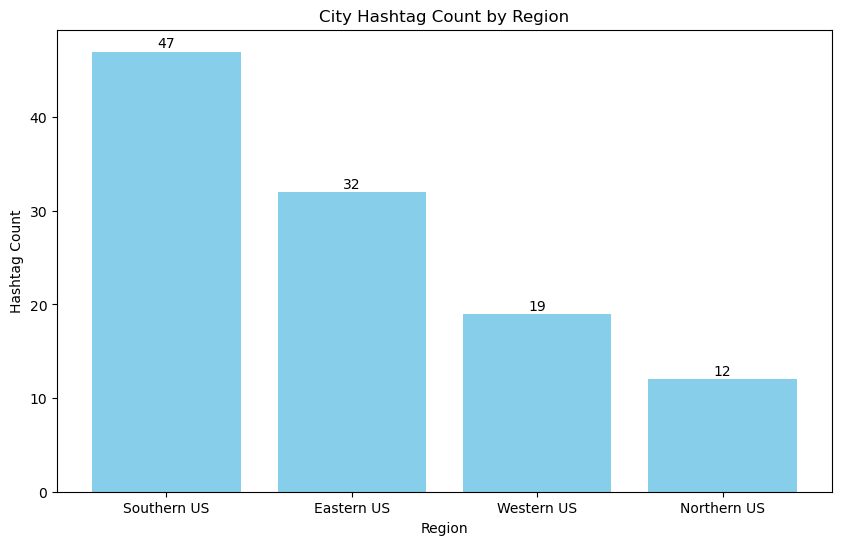

In [8]:
# city hashtag count by region
eastern_us = [
    "NewYork", "Philadelphia", "Boston", "Washington", "Jacksonville", "Charlotte", 
    "Raleigh", "VirginiaBeach", "Tampa", "Orlando", "Miami", "Baltimore", 
    "Newark", "JerseyCity", "Pittsburgh", "Providence", "Hartford", 
    "Buffalo", "Syracuse", "NewHaven", "Allentown", "Richmond"
]

northern_us = [
    "Chicago", "Detroit", "Indianapolis", "Milwaukee", "Minneapolis", "St.Paul", 
    "Columbus", "Cleveland", "Dayton", "Akron", "Rochester", "AnnArbor", 
    "GrandRapids", "Madison", "Green Bay", "Fargo", "SiouxFalls"
]

western_us = [
    "LosAngeles", "SanDiego", "SanJose", "SanFrancisco", "Seattle", "Portland", 
    "Phoenix", "Denver", "LasVegas", "SaltLakeCity", "Reno", "Sacramento", 
    "Tucson", "Fresno", "Bakersfield", "Anchorage", "Boise", "Spokane", 
    "Tacoma", "Eugene", "SantaRosa", "Oakland"
]

southern_us = [
    "Houston", "SanAntonio", "Dallas", "Austin", "ElPaso", "NewOrleans", 
    "Birmingham", "Memphis", "Nashville", "Atlanta", "FortWorth", "OklahomaCity", 
    "Tulsa", "Little Rock", "Shreveport", "CorpusChristi", "Mobile", 
    "Wichita", "Tallahassee", "Montgomery", "Huntsville", "Knoxville"
]

canada = [
    "Vancouver", "Toronto", "Montreal", "Calgary", "Ottawa", "Edmonton", 
    "Winnipeg", "QuebecCity", "Halifax", "Victoria"
]

#print(filtered_counts)
region_counts = {
    "Southern US": sum(filtered_counts[city] for city in southern_us if city in filtered_counts),
    "Eastern US": sum(filtered_counts[city] for city in eastern_us if city in filtered_counts),
    "Western US": sum(filtered_counts[city] for city in western_us if city in filtered_counts),
    "Northern US": sum(filtered_counts[city] for city in northern_us if city in filtered_counts),
}
#print(region_counts)
plt.figure(figsize=(10, 6))
bars = plt.bar(region_counts.keys(), region_counts.values(), color='skyblue')
for bar in bars:
    height = bar.get_height()  
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.1,                        
        str(height),                       
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xlabel('Region')
plt.ylabel('Hashtag Count')
plt.title('City Hashtag Count by Region')
plt.show()

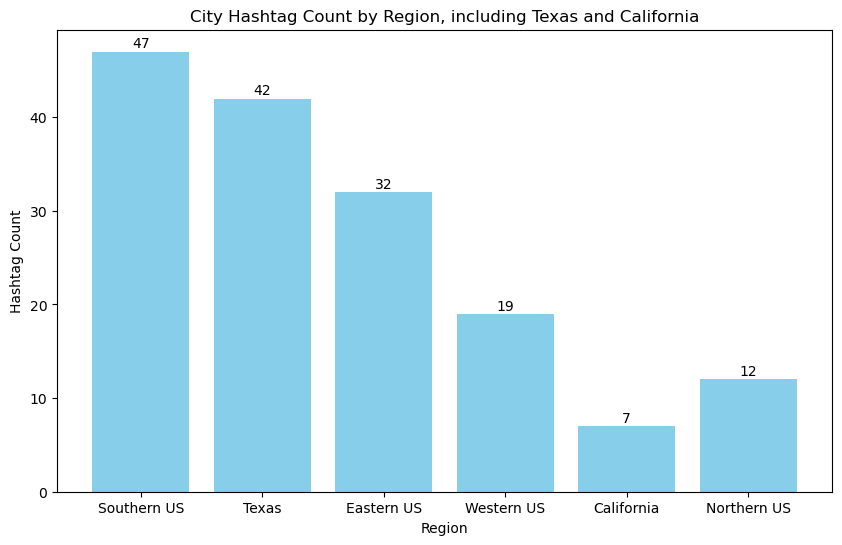

In [9]:
California = [ "LosAngeles", "SanDiego", "SanJose", "SanFrancisco", "Sacramento", 
              "Fresno", "SantaRosa", "Oakland", "Bakersfield" ]
Texas = ["Houston", "SanAntonio", "Dallas", "Austin", "ElPaso", "FortWorth", "CorpusChristi"]
region_counts2 = {
    "Southern US": sum(filtered_counts[city] for city in southern_us if city in filtered_counts),
    "Texas": sum(filtered_counts[city] for city in Texas if city in filtered_counts),
    "Eastern US": sum(filtered_counts[city] for city in eastern_us if city in filtered_counts),
    "Western US": sum(filtered_counts[city] for city in western_us if city in filtered_counts),
    "California": sum(filtered_counts[city] for city in California if city in filtered_counts),
    "Northern US": sum(filtered_counts[city] for city in northern_us if city in filtered_counts),
}
#print(region_counts)
plt.figure(figsize=(10, 6))
bars = plt.bar(region_counts2.keys(), region_counts2.values(), color='skyblue')
for bar in bars:
    height = bar.get_height() 
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.1,                        
        str(height),                       
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xlabel('Region')
plt.ylabel('Hashtag Count')
plt.title('City Hashtag Count by Region, including Texas and California')
plt.show()

#### Insight

The data from splitting the hashtag counts to each region shows that the southern and eastern areas of the U.S have the highest demand for data science jobs. Additionally we can see from the second graph that Texas takes up a large proportion of the demand in the southern U.S, at about 89%. California takes up a decent portion of the demand in the western U.S, at about 40%. We learn from this data where the majority of employers hiring these data science fields are located, as well as just how many jobs are in texas.

#### Frequency of Data Science Related Positions Across States

In addition to regions and cities, we also determined which states seemed to possess more overall demand for data science job positions by measuring the frequency of data-related tweets across all of the mentioned states in the dataset.

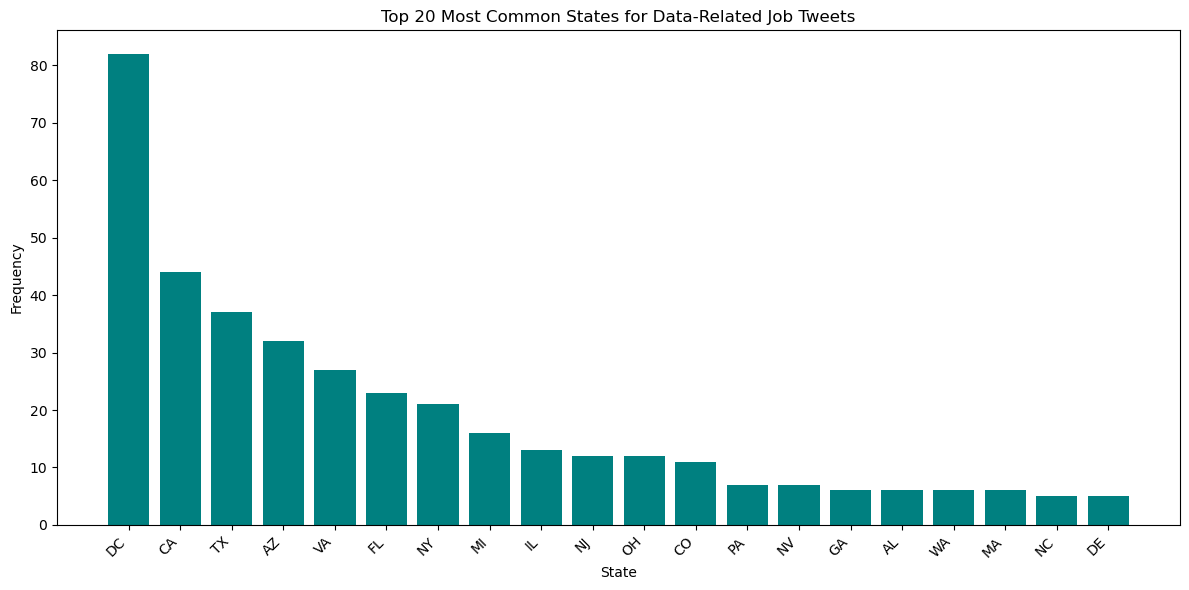

In [10]:
state_map = {
    'AL': 'ALABAMA', 'AK': 'ALASKA', 'AZ': 'ARIZONA', 'AR': 'ARKANSAS', 
    'CA': 'CALIFORNIA', 'CO': 'COLORADO', 'CT': 'CONNECTICUT', 'DE': 'DELAWARE', 
    'FL': 'FLORIDA', 'GA': 'GEORGIA', 'HI': 'HAWAII', 'ID': 'IDAHO', 
    'IL': 'ILLINOIS', 'IN': 'INDIANA', 'IA': 'IOWA', 'KS': 'KANSAS', 
    'KY': 'KENTUCKY', 'LA': 'LOUISIANA', 'ME': 'MAINE', 'MD': 'MARYLAND', 
    'MA': 'MASSACHUSETTS', 'MI': 'MICHIGAN', 'MN': 'MINNESOTA', 'MS': 'MISSISSIPPI', 
    'MO': 'MISSOURI', 'MT': 'MONTANA', 'NE': 'NEBRASKA', 'NV': 'NEVADA', 
    'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 'NY': 'NEW YORK', 
    'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'OH': 'OHIO', 'OK': 'OKLAHOMA', 
    'OR': 'OREGON', 'PA': 'PENNSYLVANIA', 'RI': 'RHODE ISLAND', 'SC': 'SOUTH CAROLINA', 
    'SD': 'SOUTH DAKOTA', 'TN': 'TENNESSEE', 'TX': 'TEXAS', 'UT': 'UTAH', 
    'VT': 'VERMONT', 'VA': 'VIRGINIA', 'WA': 'WASHINGTON', 'WV': 'WEST VIRGINIA', 
    'WI': 'WISCONSIN', 'WY': 'WYOMING', 'DC': 'DISTRICT OF COLUMBIA'
}
state_reverse_map = {v: k for k, v in state_map.items()}
state_reverse_map['WASHINGTON, DC'] = 'DC'

pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in list(state_map.keys()) + list(state_reverse_map.keys())) + r')\b')

def get_states(location):
    if not isinstance(location, str):
        return None
    if 'DC' in location and 'WA' in location:
        return 'DC'
    matches = {state if state in state_map else state_reverse_map[state] for state in pattern.findall(location)}
    return ', '.join(sorted(matches)) if matches else None

filtered_data['Location'] = filtered_data['Location'].astype(str).str.replace(r'[^\w\s,]', '', regex=True).str.upper()
filtered_data['State'] = filtered_data['Location'].apply(get_states)

all_states = ', '.join(filtered_data['State'].dropna()).split(', ')
state_counts = Counter(all_states)
state_df = pd.DataFrame(state_counts.items(), columns=['State', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(state_df['State'], state_df['Frequency'], color='teal')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common States for Data-Related Job Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insight

Based on the barplot, it appears that D.C. (District of Columbia), California and Texas boast the most open data science related positions
from employers posted on twitter, where as Deleware and North Carolina have a relative drought of available data science positions posted on twitter.


#### Conclusion

Question: Which locations possess the highest demand for data science professions?

Answer: From analyzing the hashtag and location data, we can conclude Washington D.C., Texas and California have the highest demand for data-related jobs. Other than Washington DC, some of the most popular cities for data-related jobs were Houston, San Antonio, Atlanta. Region-wise, the demand for data science and tech jobs seemed to be most prevalent across the southern U.S.


## Question

What is the change in the frequency of mention of specific skills (i.e. SQL, Python, Statistics, Machine Learning, Big Data) found in data science related tweets over the past 2 years (2019-2023)?

#### Motivation

Analyzing the change in mention of popular tech skills can help aspiring data scientists optimize their learning journies
and avoid wasting time on learning less used skills in the market.

#### Analysis

In order to determine the frequency of mention of popular skills such as Python, SQL, Statistics, Machine Learning, and Big Data, we analyzed
the frequencies of each of these terms for all of the tweets recorded per each year from 2019 to 2023, and then modeled the overall change in frequency of each of these skills using a line plot

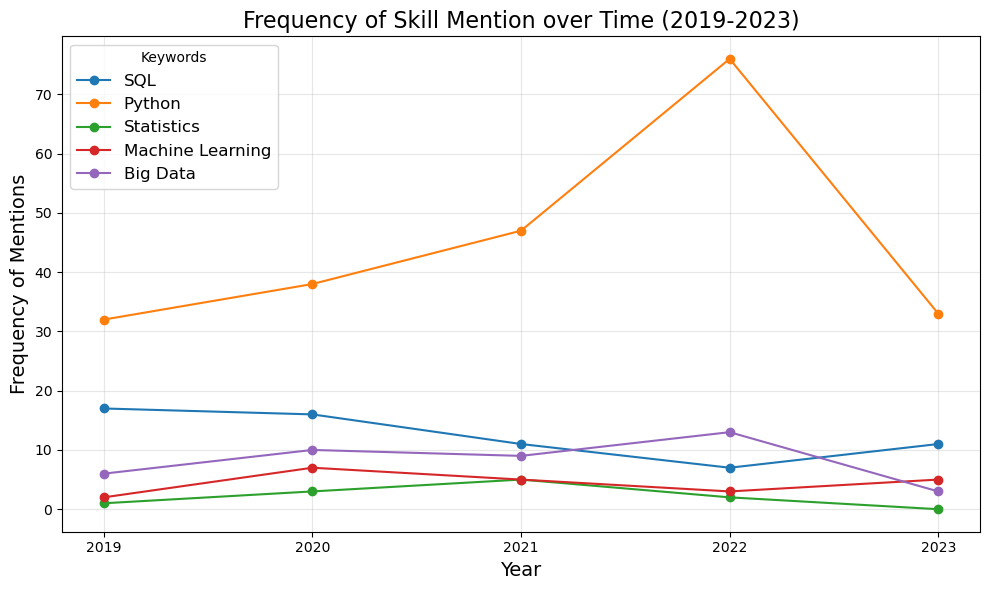

In [11]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Year'] = data['Timestamp'].dt.year

years = range(2019, 2024)
# Updated keywords list
keywords = ['SQL', 'Python', 'Statistics', 'Machine Learning', 'Big Data']
yearly_keyword_frequencies = {year: {keyword: 0 for keyword in keywords} for year in years}

for year in years:
    year_data = data[data['Year'] == year]
    for text in year_data['Text'].dropna():
        for keyword in keywords:
            yearly_keyword_frequencies[year][keyword] += len(re.findall(rf'\b{keyword}\b', text, flags=re.IGNORECASE))

'''
print("Keyword Frequencies by Year:")
for year, frequencies in yearly_keyword_frequencies.items():
    print(f"\nYear: {year}")
    for keyword, count in frequencies.items():
        print(f"  {keyword}: {count}")
'''

years = list(yearly_keyword_frequencies.keys())
frequencies = {keyword: [yearly_keyword_frequencies[year][keyword] for year in years] for keyword in keywords}

plt.figure(figsize=(10, 6))
for keyword, counts in frequencies.items():
    plt.plot(years, counts, marker='o', label=keyword)

plt.title('Frequency of Skill Mention over Time (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency of Mentions', fontsize=14)
plt.xticks(years)
plt.grid(alpha=0.3)
plt.legend(title="Keywords", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

#### Conclusion

Question: What is the change in the frequency of mention of specific skills (i.e. SQL, Python, Statistics, Machine Learning, Big Data) found in data science related tweets over the past 2 years (2019-2023)?

Answer: 

The visualization allows us to see the change in the amount of tweets related to the keywords SQL, Python, Statistics, Machine Learning, and Big Data over the years 2019-2023. Python had a continuous rise in frequency from 2019-2023 with its peak in 2022. It then fell off in 2023. Statistics, Machine Learning and Big Data had a relatively constant frequency over the timespan. 

# Project Summary and Conclusion

#### Impacts

- Aspiring data scientists should emphasize programming and database skills along with their specialized machine learning and statistics knowledge in order to maximize their desirability on the job market
  
- Overall job market demand seems to be highest around the southern U.S. region
  
- Python seems to have the highest growth in terms of frequency of mention overtime, indicating that it is the preferred programming language for data science canditates

#### Future 

- More complex techniques such as textual analysis (TFIDF, TF) can be used for extracting more specific and useful insights to determine the most frequent skills associated with data science positions for various companies)

- We can widen the scope of this entire project as a whole to construct insights not only for data science jobs in order to provide more useful reports for people in other career paths as well.
